<a href="https://colab.research.google.com/github/KimManSub/opencv_practice/blob/main/3_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 기초

AND,OR,XOR 연산

In [1]:
import tensorflow as tf

x1 = [0,0,1,1]
x2 = [0,1,0,1]
x = tf.transpose(tf.constant([x1,x2],dtype=tf.float32))
#x1,x2 텐서플로우 사용할수 있는 형태로 변환,float32 실수형으로 변환 하고 가로세로 바꾸기
and_y = tf.constant([0,0,0,1],dtype=tf.float32)
or_y = tf.constant([0,1,1,1],dtype=tf.float32)
xor_y = tf.constant([0,1,1,0],dtype=tf.float32)

print(f"x: \n{x}")
print(f"AND y:\t{and_y}",f"OR  y:\t{or_y}",f"XOR y:\t{xor_y}",sep="\n")

x: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
AND y:	[0. 0. 0. 1.]
OR  y:	[0. 1. 1. 1.]
XOR y:	[0. 1. 1. 0.]


# AND,OR,XOR 게이트 입출력관계 시각화

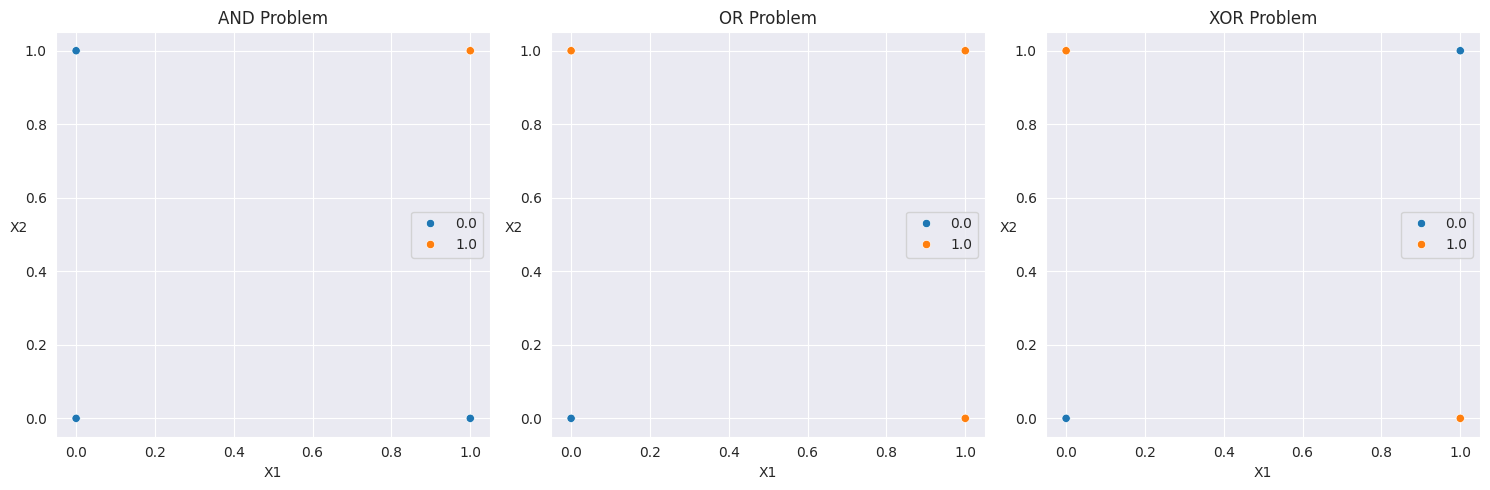

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#1행 3열 서브 플롯 생성, 가로 15,세로 5

# AND 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=and_y, ax=axs[0])
# x=첫번째 입력값들,y=두번째 입력값들,and게이트 출력값에 따라 다르게 표시, 서브 플롯에 그림
axs[0].set_title("AND Problem")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2", rotation=0)

# OR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=or_y, ax=axs[1])
axs[1].set_title("OR Problem")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2", rotation=0)

# XOR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=xor_y, ax=axs[2])
axs[2].set_title("XOR Problem")
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2", rotation=0)
plt.tight_layout() #간격사이 자동조정
plt.show()

# 퍼셉트론

In [3]:
# MLP 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])
# Sequential 층을 순차적으로 쌓는 가장 기본적인 신경망 모델
# Dense 완전연결 뉴런층(fully connected layer) 생성
# input_dim=2 입력(x1,x2)
# 시그모이드 활성화 함수 (0~1값 사이 출력하는걸 사용함.)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# AND 연산
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'],)

#SGD(경사하강법)= 틀린부분 학습하고 정답에 가까워짐
# learning_rate=1.0 = 숫자가 크면 더 크게 수정, 작으면 작게 수정
# 손실함수-> 모델이 틀린정도를 측정하는 방법 loss='binary_crossentropy'
# 학습된 모델의 최종 손실값과 정확도를 계산
# 학습 데이터로 평가


In [5]:
model.fit(x, and_y, epochs=100, batch_size=4)
# 학습된 모델로 입력 데이터에 대한 예측 수행
# 0~1 사이의 실수값으로 출력 (0.5를 기준으로 0 또는 1로 해석)
# x = 입력데이터,and_y = 정답 데이터([0,0,0,1]),전체 데이터쎗을 100번 학습, batch_size=4  한번에 4개의 데이터로 학습
#예시( 입력 [0,0],[0,1],[1,0],[1,1]) --> 이게 4개 1배치 일때 예측값이 [0.2,0.3,0.4,0.8] 이면 정답기반 [0,0,0,1] 기반으로 손실 계산함.


# 모델 평가
loss, accuracy = model.evaluate(x, and_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# 학습된 모델의 최종 손실값과 정확도 계산 망약 예측한 값이 정답이랑 같으면 1 아니면 0
# 학습데이터 평가


# 예측
predictions = model.predict(x)
print(f'Predictions:\n{predictions}')
#학습된 모델로 데이터에 대한 예측
#0~1사이의 실수값으로 출력(0.5를 기준으로 0또는 1로 해석)

# 가장 단순한 형태의 퍼셉트론 구현 (은닉층 없음)
# AND 게이트는 선형 분리 가능하므로 이 단순한 구조로도 학습 가능
# 실제 딥러닝에서는 더 복잡한 문제를 다루므로 보통 더 많은 층과 뉴런을 사용

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step - accuracy: 0.7500 - loss: 0.8172
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.7777
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.7419
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7500 - loss: 0.7091
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7500 - loss: 0.6790
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7500 - loss: 0.6513
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7500 - loss: 0.6256
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7500 - loss: 0.6017
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7500 - loss: 0.5796
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.5591
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7500 - loss: 0.5400
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7500

In [6]:
# OR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, or_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, or_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7500 - loss: 0.6822
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.5582
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.4938
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.4551
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.4285
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.4084
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.3919
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.3777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.3650
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.3533
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.3426
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - l

In [7]:
# XOR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

#다층 퍼셉트론이없어 잘안됨

#단일층 구조와 다층 구조의 차이점

# 단일층 구조 - 입력데이터 선형적으로 분리하는데만 적합함
# 다층 구조 - 은닉층 추가 되면서 모델 표현력 증가 (비선형 활성화 함수 ReLu,tanh 등) 선형적으로 구분할수 없을때 사용
# 구조
#단일층 구조 :  입력 -> 출력 (제한적)
#다층 구조 :  입력  -> 은닉층 -> 출력 ( 고차원적, 복잡한 표현 가능)


#여기서 은닉층--> 입력 데이터를 조합하여 학습 가능한 특징을 생성함. 단순히 입력 데이터를 전달하는게 아닌 복잡한 변환과 학습을 통해 문제 해결함.
# 가중치(Weights)와 바이어스(Bias) 를 통해서 문제를 해결하는데
# 가중치는 데이터의 중요도를 나타내고 (더 크게 반영할건지?, 작게 반영할껀지)
# 바이어스는 (가중치에 곱해진결과) 선형 변화에 일정한 값을 3ㅓ더해 데이터에 더 유연하게 처리 할수 있게 함.

# 활성화함수종류

# ReLU: 양수는 그대로 출력, 음수는 0으로 출력. 학습 속도가 빠르고, 잘 작동
# Sigmoid: 0~1 사이의 값으로 출력. 확률을 표현할 때 자주 사용
# Tanh: -1~1 사이의 값으로 출력. 중심값이 0이라 대칭적인 데이터를 처리하기 적합



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5000 - loss: 0.7834
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.7431
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7242
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7153
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.7108
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.7082
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.7063
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.7049
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.7037
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7027
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7017
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - l

#다층 퍼셉트론

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5000 - loss: 0.6884
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.6487
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6236
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6038
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.5823
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.5682
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.5477
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.5269
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.5084
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.4872
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.4750
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - l

인공지능 모델의 설계 및 학습

In [9]:
# 임의의 독립 변수 X 값 생성
import tensorflow as tf

x = tf.random.uniform(shape=[100], minval=1, maxval=4)
#1~4사이 균일분포를 지닌 100개의 x값 생성
print(x)

tf.Tensor(
[1.4878867 3.622806  3.457089  1.787832  1.4136707 1.3392129 2.0237384
 1.7427387 3.7237673 3.621865  1.0216597 3.117598  2.1020079 3.6472688
 2.6265826 2.7352424 3.8973646 3.4152799 3.8795388 2.6427832 3.2376668
 1.2014425 1.3595651 3.5306535 2.634304  2.4562857 2.1369226 3.512229
 1.5163388 1.44896   3.975762  1.2252308 1.6269842 2.3398278 2.9646573
 3.1780975 1.3780892 2.1717615 3.7243326 3.9722161 2.078979  1.9189967
 2.341118  1.6187248 2.5576947 2.2697015 3.1558962 1.117808  2.574978
 3.6583853 1.8550893 3.297987  2.027935  1.8868438 3.1012318 3.4526405
 2.4022884 1.2762325 2.1322565 2.6954942 1.147333  2.5005012 2.8896627
 2.6014676 2.469514  1.9655473 1.8309816 1.7100548 2.1432452 2.0732055
 2.5762644 3.3858194 2.7623665 3.0890589 1.0816854 2.920667  1.6763734
 2.3872604 1.8315141 3.2020383 2.3455484 2.677291  2.0407877 3.8714275
 1.5707072 1.4267395 2.5493426 2.3229332 1.2997458 3.1236508 2.8331866
 3.0717235 2.2828133 2.538606  3.919642  3.8358083 3.3108816 1.52226

In [10]:
# 선형 관계가 있는 종속 변수 Y 값 생성
slope = 1.5
intercept = 3

epsilon = tf.random.truncated_normal(shape=[100], mean=0, stddev=0.3)
#평균 0, 표준편차 0.3 노이즈 추가
y = slope * x + intercept + epsilon
#실제 선형관계 1.5x+3= y
print(y)

tf.Tensor(
[4.9269905 8.923595  8.075091  5.5405664 5.21864   5.5312667 5.5606704
 5.291063  8.294778  8.504734  4.0642166 8.016062  5.6381454 8.84952
 7.2911615 6.705819  8.317947  7.5521207 8.714999  7.1995544 7.4196672
 4.657204  4.940528  8.736226  7.1065674 6.7850757 6.5649247 8.372388
 5.798127  5.328084  8.414943  4.707556  5.213453  6.4627604 7.7258873
 8.212984  5.5291467 6.4061813 8.235968  8.457225  6.6017294 5.8733773
 6.3743634 5.4150305 6.8963537 6.368758  7.999251  4.402625  6.672975
 8.652013  5.788286  8.122056  6.201503  5.744036  8.179916  8.130158
 6.3791666 5.131012  6.0526958 6.739741  4.738052  6.8732424 7.6850624
 6.8220053 6.5232654 5.35809   5.498338  5.756218  6.0736003 6.1072483
 7.210763  8.131711  7.361188  7.4335284 4.65106   7.152001  5.6986427
 7.0000663 5.7150908 7.938421  6.205612  7.0712337 5.945957  9.198898
 5.7176    5.34099   6.288186  6.627262  4.8935127 7.815476  7.3843937
 7.5944347 6.7294626 6.7724767 8.939624  8.914883  7.825484  5.542325
 8

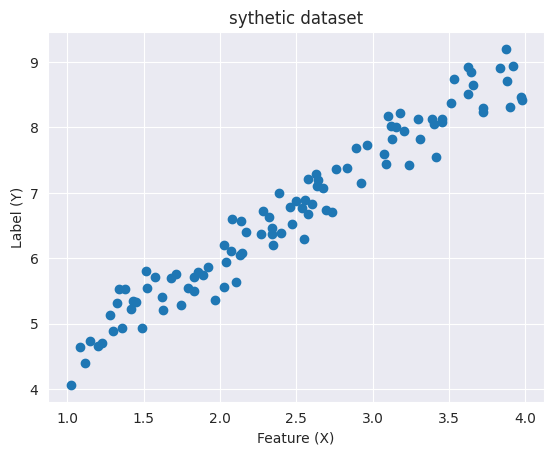

In [11]:
# 맷플로립을 사용한 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#darkgrid 사용
plt.scatter(x, y)
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('sythetic dataset')
plt.show()

텐서플로로 선형 데이터 모델링


모델 설계

In [12]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [13]:
# !pip install --upgrade tensorflow

In [14]:
# TensorFlow와 Keras를 불러오기
import tensorflow as tf
from tensorflow.keras.layers import Dense

# 확인
print("TensorFlow version:", tf.__version__)
print("Dense layer loaded successfully!")

TensorFlow version: 2.18.0
Dense layer loaded successfully!


In [15]:
from tensorflow.keras import Sequential
# Keras Sequenial 기본신경망 신경만 뉴런 밀집층

In [16]:
from tensorflow.keras.layers import Dense
# Dense층 -> 모든 뉴런이 이전 층의 모든 뉴련과 연결되는 기본적인 신경망 층(선형)

In [17]:
model = Sequential()
#모델 인스턴스 생성 - 레이어들을 순차 추가가능
model.add(Dense(1, input_shape=(1,)))
# 출력뉴런 1개 , 입력특성 1개 지정
model.compile(loss='mean_squared_error', optimizer='sgd')
#학습모델 설정,평균 제곱 오차를 손실 함수로 사용(회귀문제 적합) , 확률적 경사 하강법을 옵티마이저로 사용

모델학습

In [18]:
x_train = tf.reshape(x, (-1, 1))
#-1 자동크기계산, 각행에 1의 특성을가지도록 지정
x_train.shape
# 변환 전: [1.2, 2.3, 3.1, ..., 3.8]  # 1차원 배열

# 변환 후: [[1.2],
#           [2.3],
#           [3.1],
#           ...,
#           [3.8]]  # 2차원 배열 (100행 1열)


TensorShape([100, 1])

In [19]:
history = model.fit(x_train, y, epochs=300)
#점점 오차율이 감소해야 정상

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3372  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5877  
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0070 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2220 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7278 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5723 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5495 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5064 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5176 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5501 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5139 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5297 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4528 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4860 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4568 
Epoch 16/300
4/4

In [20]:
weights, bias = model.get_weights()
print("Weights (Slope):", weights)
print("Bias (Intercept):", bias)

Weights (Slope): [[1.5817183]]
Bias (Intercept): [2.7902343]


In [21]:
# 합성곱 신경망

# #CNN의 구성요소
# (1) 합성곱(Convolution) 층
# 합성곱 층에 존재하는 사각형 모양의 사각형 모양의 가중치 필터 = 합성곱 필터
# 이 필터가 입력된 이미지 데이터와 연산됨
# 역할: 이미지의 로컬 영역(작은 패치)을 살펴보면서 패턴을 학습

# 작동 원리:
# 필터 : 이미지 위를 슬라이딩하며 특정 패턴(엣지, 코너 등)을 탐지 ★여러 커널의 집합★
# 가로*세로*필터 즉, 3차원임 -->  feature라하고 , 결과물 은 3차원 백터이므로 feature vector,Fature Map(특징맵) 이라함.
# 예시: 3x3 필터가 5x5 이미지에 적용되면 3x3 영역마다 연산 수행 → 더 작은 특징 맵 생성.
# 이미지의 특정 패턴(엣지,코너 등)을 감지하는 작은 행렬, 학습과정에서 데이터를 가장 잘 설명하는 값으로 조정됨
# - 좀더 고차원 엣지, 코너 또는 더 복잡한 수준 탐지
# 하나의 특징맵을 생성하기 위해 여러 커널을 포함하는 집합
# 보통 3X3, 5X5, 7X7 로 구성  (너무작으면 학습 어려움, 너무 크면 중요한정보 놓침)

# CNN에서 초반 합성곱층은 **로우 레벨 특징(엣지, 코너 등)**을 학습하고, 뒤로 갈수록 **하이레벨 특징(더 추상적인 개념, 예: 얼굴, 물체 등)**을 학습

# 초기 층: 간단한 패턴(엣지, 텍스처)을 학습
# 중간 층: 더 복잡한 구조(선, 도형 등)를 학습
# 마지막 층: 고수준 특징(객체, 얼굴 등)을 학습


#커널 -> 이미지 합성곱(convolution)연산을 수행하는 작은 행렬
# - 역활 임력 이미지 위를 움직이면서 특정 패턴이나 특징 감지
# -엣지,텍스쳐, 모양 등 로우레벨 특징 감지

# - 스프라이드
# 필터가 이동하는 간격 보통 1사용 , 더 큰값을 사용하면 특징맵 크기 작아짐

# - 패딩
# 필터를 적용할 때, 이미지 가장 자리 데이터를 처리하는 방식

# (2) 활성화 함수 (ReLU, Rectified Linear Unit)
# 역할: 비선형성을 추가하여 신경망이 복잡한 관계를 학습할 수 있도록 도움.
# 수식:
# 𝑓(𝑥)=max(0,𝑥)f(x)=max(0,x) (0보다 작으면 0, 크면 그대로 통과).

# (3) 풀링(Pooling) 층
# 역할: 특징 맵의 크기를 줄여 계산량을 감소시키고 중요한 정보를 요약.
# 종류:
# 최대 풀링(Max Pooling): 각 영역에서 가장 큰 값을 선택.
# 평균 풀링(Average Pooling): 각 영역의 평균 값을 선택.
# 장점: 위치 변화(이미지가 약간 이동해도)에도 강건한 특징을 학습.

# (4) 완전 연결(Dense) 층
# 역할: 학습된 특징을 기반으로 최종 분류 또는 예측 수행.
# 특징 맵을 1차원 벡터로 펼친(flatten) 뒤, 여러 개의 뉴런과 연결.

#간단한 CNN 구성요소
#Input Image → Conv → ReLU → Pool → Conv → ReLU → Pool → Flatten → Dense → Output

# 왜 32*32로 작동하는가??
# CNN 모델에서의 효율성: 32x32 크기는 작은 이미지 처리에 적합하고, 적절한 계산량을 유지하면서도 유용한 특징을 추출
# 이미지를 줄이는 이유 : 계산 효율성, 메모리 절약, 모델 학습 속도 향상, 과적합 방지



# CNN을 배우면 할 수 있는 것
# 이미지 분류
# 객체 탐지
# 이미지 생성 (GAN과 결합)
# 스타일 전이 (예: 사진을 그림처럼 변환)

# 딥러닝을 활용한 이미지 처리

이미지 분류

이미지 분류를 위한 데이터 전처리

In [4]:
# matplotlib의 pyplot 모듈을 가져옴. 데이터 시각화를 위해 사용.
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드 (사전 학습된 데이터셋 제공)
# CIFAR-10은 32x32 크기의 60,000개 컬러 이미지로 구성된 데이터셋이며, 10개의 클래스(비행기, 자동차, 새 등)를 포함.
from tensorflow.keras.datasets import cifar10

# Keras의 Sequential API를 사용하여 신경망 모델을 정의하기 위해 가져옴.
from tensorflow.keras.models import Sequential

# 신경망의 구성 요소인 Dense(완전 연결 층)와 Flatten(2D 데이터를 1D로 평탄화) 레이어를 가져옴. (예 32,32,3 크기 이미지) -> (32*32*3)으로 변환
from tensorflow.keras.layers import Dense, Flatten

# 모델 학습 중 체크포인트 저장(성능이 향상될때마다 저장기능) 및 학습 조기 종료(성능이 향상되지 않으면 종료)(Early Stopping)를 위해 콜백 가져옴.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



In [5]:
 # CIFAR-10 데이터 세트를 불러옵니다.

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
# 데이터를 확인합니다.

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# train_images -> 모델이 이 이미지를 보고 패턴을 학습
# train_labels -> 각 이미지에 해당 하는 정답 라벨 -> 이걸 통해서 이미지를 분류하는법을 배우게 됨

# 훈련완료 후에는

# test_images와 test_labels 테스트 데이터셋을 사용
# 모델이 얼마나 잘 학습되었는지 평가할 수 있음

#훈련 데이터 이미지수 ,가로픽셀,가로픽셀, 채널색상수)
#테스트 이미지 데이터, 가로,세로크기,색상 채널

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
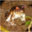

In [7]:
# 정규화된 이미지 데이터를 하나 확인

train_images[0]

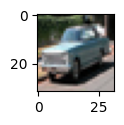

In [8]:
# 확인을 위해 출력
plt.figure(figsize=(1, 1))
plt.imshow(train_images[32])

In [9]:
# 정규화를 위해 255로 나누어 줌

train_images = train_images / 255.0
test_images = test_images / 255.0

#print(train_images[0])
#print(test_images[0])

In [10]:
# 훈련 데이터셋(0~45000)과 검증 데이터셋(45001~50000)으로 나누어 줌

#훈련 데이터셋
val_images = train_images[45000:]
val_labels = train_labels[45000:]

#검증 데이터셋
train_images = train_images[:45000]
train_labels = train_labels[:45000]

#왜 이런식으로 하는지??
# 모델이 훈련 데이터에만 맞춰져서 잘 동작하는 것처럼 보일 수 있기 때문에,
# 검증 데이터를 통해 모델이 실제로 얼마나 잘 일반화 되는지 확인 할 수 있음 (과적합 방지)

In [11]:
# 모델을 생성

mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#여기서 Flatten은 다차원 배열을 1차원 배열로 변경 32*32*3=3072개 특성으로 변경함. 2D데이터를 신경망에 입력할수 있게 1D 백터값으로 변경
#Dense(512, activation='relu') 음수를 0 ,양수값은 그대로 출력, 과적합 방지 하는데 도움을 줌 첫번재 학습된 특성 추출 함 -->512개 뉴런을 통해 데이터를 학습(저수준 : 엣지, 색상)
#Dense(256, activation='relu') 이전층 추출된 특성을 더 작은 차원으로 압축해서 보다 추상적인 특징을 학습 (점점 고수준 패턴 특정)
#Dense(128, activation='relu') 이전층 추출된 특정을 더 작은 차원으로 압축해서 ★ 128개의 특성으로 표현함 ★(고수준 : 형태,객체)
#Dense(10, activation='softmax') 10개의 뉴런을 가지고 ,확률분포로 반환 0,1 사이값이 되고 모든 출력값은 1이 됨
#10개의 분류할 클래스가 있을때 각 클래스에 대한 확률 계산

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 모델의 구조를 확인합니다.

mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
mlp_model.compile(
    optimizer='adam',          # 최적화 함수: Adam optimizer (일반적으로 많이 사용하는 최적화 알고리즘임) (SGD,RMSprop 등이 있음)
    loss='sparse_categorical_crossentropy',  # 손실 함수: 다중 클래스 분류에 사용 (라벨이 정수형식 일때 사용) 원-핫 인코딩 형식이면 categorical_crossentropy사용해야함.
    metrics=['accuracy']       # 모델 평가 지표: 정확도
)

# 훈련 시작
mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))
# 훈련 이미지 데이터 tran_images = 45000,32,32,3 형태 배열
# 훈련 이미지에 대한 라벨 어떤 클래스에 속하는지에 대한 정답 레이블 위에 사요했던 CIFAR-10은 각  이미지가 10개의 클래스로 분류됨
# train_labels는 (45000, 1) 형태로, 각 훈련 이미지에 대한 클래스 번호를 포함
# 모델은 train_images를 보고 train_labels에 맞는 예측
# epochs=5 훈련 데이터 5번 반복

#validation_data=(val_images, val_labels) ==> 검증데이터 사용 검증데이터 이미지, 검증데이터 라벨 이걸로 검증함.

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2741 - loss: 2.0015 - val_accuracy: 0.3712 - val_loss: 1.7329
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3805 - loss: 1.7187 - val_accuracy: 0.4118 - val_loss: 1.6708
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4166 - loss: 1.6282 - val_accuracy: 0.4260 - val_loss: 1.5928
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4392 - loss: 1.5577 - val_accuracy: 0.4322 - val_loss: 1.5942
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4601 - loss: 1.5109 - val_accuracy: 0.4468 - val_loss: 1.5400


In [14]:
# 모델을 평가

mlp_model.evaluate(test_images, test_labels)
#손실 정확도 47%, 손실 1.48

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4475 - loss: 1.5302


[1.53579843044281, 0.44769999384880066]

# 합성곱 신경망을 활용한 이미지 분류

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
# conv2D 공간적 특징을 추출하는데 사용
# MaxPooling2D 2D 최대 풀링 층 -> 이미지의 크기를 줄이고 압축
# Dropout 무작위로 일부 뉴런을 비활성화하여 과적합 방지 역활

In [16]:
#모델생성

cnn_model = Sequential([

    # 첫 번째 합성곱 층 (Conv2D)
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    # 첫 번째 최대 풀링 층 (MaxPooling2D) 이미지 크기가 동일하게 유지되도록 패딩추가 ,렐루,RGB 이미지
    MaxPooling2D((2, 2)), #크기 축소 2X2 크기의 윈도우 사용 각 ,2X2 영역에서 최대닶을 추줄하여 크기를 줄임 (중요 특징만 추출하며, 모델 과적합 방지)

    # 두 번째 합성곱 층 (Conv2D) 64개의 3X3필터 사용, 입출력 크기 동일하게 패딩하고 ,렐루
    Conv2D(64, (3, 3), padding='same', activation='relu'),
   # 두 번째 최대 풀링 층 (MaxPooling2D)
    MaxPooling2D((2, 2)),

    # 세 번째 합성곱 층 (Conv2D) 이미지 복잡한 패턴 추출
    Conv2D(64, (3, 3), padding='same', activation='relu'),

    # 평탄화 층 (Flatten) 1차원배열로 변환
    Flatten(),

    # 드롭아웃 층 (Dropout) 30% 뉴런을 무작위 비활성화 과적합 방지
    Dropout(0.3),

    # 완전 연결층 (Dense) 64개 뉴런가지고,렐루 활성화 함수를 통해 비선형성 추가함.(복잡한 패턴 학습 및 특성 학습 )
    Dense(64, activation='relu'),

    # 드롭아웃 층 (Dropout) 50% 비활성화
    Dropout(0.5),

    # 출력층 (Dense, 10개의 클래스에 대해 확률 출력)
    Dense(10, activation='softmax')
])


# 합성곱 층 (Conv2D): 이미지에서 중요한 특징을 추출
# 최대 풀링 층 (MaxPooling2D): 추출된 특징을 압축하고, 계산량을 줄이며 중요한 정보만 유지
# 드롭아웃 (Dropout): 과적합을 방지하기 위해 훈련 중 일부 뉴런을 비활성화
# 완전 연결층 (Dense): 추출된 특징을 바탕으로 예측을 수행
# 소프트맥스 출력층 (Dense with softmax): 클래스별 확률을 출력하여 최종 예측을 생성

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# 모델의 구조를 확인합니다드

cnn_model.summary()

# 필터크기(3*3)*입력채널(3)*출력채널(32)+32 = 896
# 가로 32,세로 32,채널 32

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모델을 컴파일합니다.

cnn_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
# EarlyStopping, ModelCheckpoint 콜백을 정의

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: 검증 손실(val_loss)이 5번 동안 개선되지 않으면 훈련 중지
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# monitor: 관찰할 지표 (여기서는 검증 손실) val_loss
# patience: 개선이 없어도 학습을 지속할 에포크 수  -- 5회 5번동안 검증손실이 감소하지 않으면 학습 중단


# ModelCheckpoint: 가장 성능이 좋은 모델만 저장
model_checkpoint = ModelCheckpoint(
    filepath='best_cifar10_cnn_model.keras',  # 파일 이름을 .keras 확장자로 설정
    monitor='val_loss',                      # 검증 손실 기준
    save_best_only=True,                     # 가장 좋은 성능의 모델만 저장
    save_weights_only=False,                 # 모델 전체 저장
    verbose=1                                # 저장 시 메시지 출력
)



In [24]:
# 모델을 학습시킵니다.
# 중간에 학습이 중단

history = cnn_model.fit(
    train_images,
    train_labels,
    batch_size=512,
    epochs=100,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2003 - loss: 2.1511
Epoch 1: val_loss improved from inf to 1.67569, saving model to best_cifar10_cnn_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.2010 - loss: 2.1496 - val_accuracy: 0.4050 - val_loss: 1.6757
Epoch 2/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3754 - loss: 1.7178
Epoch 2: val_loss improved from 1.67569 to 1.37694, saving model to best_cifar10_cnn_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3762 - loss: 1.7153 - val_accuracy: 0.5140 - val_loss: 1.3769
Epoch 3/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4474 - loss: 1.5269
Epoch 3: val_loss improved from 1.37694 to 1.25053, saving model to best_cifar10_cnn_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4478 - loss: 1.5257 - val_accuracy: 0.5646 - val_loss: 1.2505
Epoch 4/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4893 - loss: 1.4225
Epoch 4: val_loss im

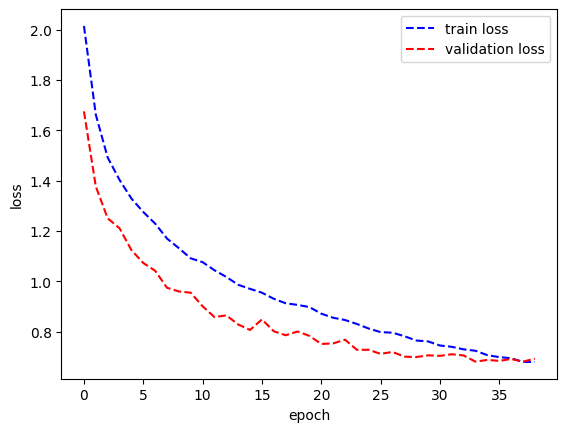

In [25]:
# 각 스텝의 학습 손실과 검증 손실을 그래프로 나타냅니다.

# train loss 훈련 손실
# validation loss 검증 손실

plt.plot(history.history['loss'], 'b--') #파란색점선
plt.plot(history.history['val_loss'], 'r--') #붉은색 점선
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [26]:
# 모델을 평가

cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7482 - loss: 0.7216


[0.7229250073432922, 0.7491999864578247]

In [27]:
# 예측 레이블 배열을 생성합니다.

predicted_labels = cnn_model.predict(test_images)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [28]:
# 각 배열의 최대 값의 색인을 뽑아내어 예측 레이블로 사용합니다.

import tensorflow as tf

predicted_labels = tf.argmax(predicted_labels, axis=1)
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 0, 7])>

In [29]:
label_to_name = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

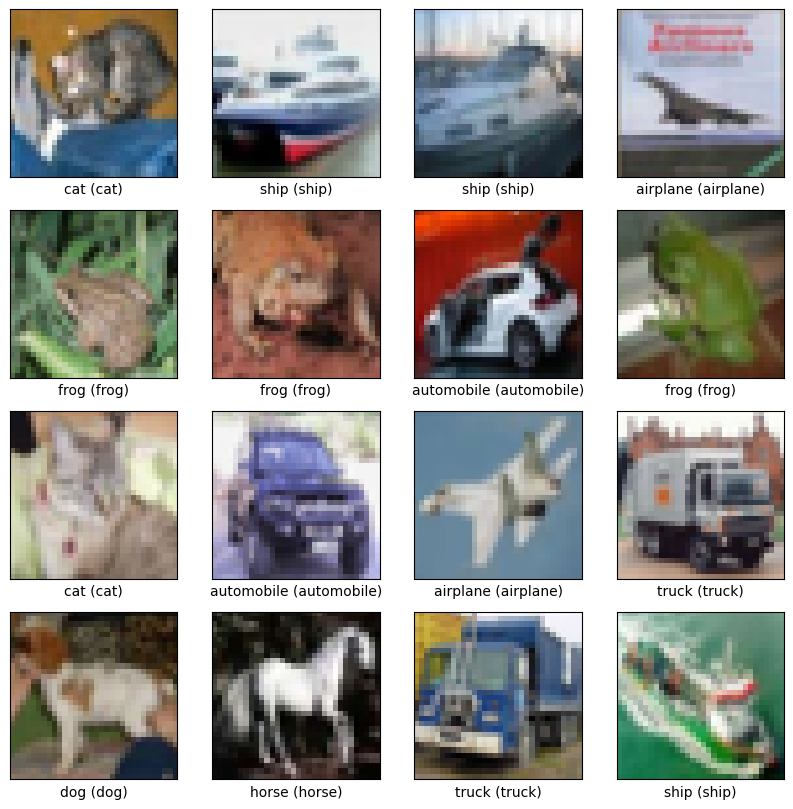

In [31]:
# test_images를 시각화하여 test_labels와 predicted_labels를 비교
# test_labels와 predicted_labels가 다를 때, xlabel의 색깔을 빨강색으로 변경

import matplotlib.pyplot as plt

# 10x10 크기의 시각화 창을 생성 (16개의 이미지를 4x4 grid로 배치)
plt.figure(figsize=(10, 10))

# 16개의 이미지를 4x4 그리드로 시각화
for i in range(16):
    plt.subplot(4, 4, i+1)  # 4x4 그리드에서 i+1번째 subplot을 설정
    plt.xticks([])  # x축 눈금을 숨김
    plt.yticks([])  # y축 눈금을 숨김
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # test_images[i] 이미지를 흑백으로 표시

    # 실제 라벨과 예측 라벨을 문자열로 생성. 예: "cat (dog)"
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"

    # 예측이 틀리면 라벨 색상을 빨간색으로, 맞으면 검정색으로 설정
    plt.xlabel(xlabel, color='red' if test_labels[i][0] != predicted_labels[i] else 'black')

# 이미지를 화면에 표시
plt.show()


# 객체 인식

In [32]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일을 다운로드
!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg

# 이미지 파일 경로 지정
image_path = "/content/three young man.jpg"

# 이미지 로드 (BGR 색상으로 로드됨)
image = cv2.imread(image_path)

# 이미지를 그레이스케일로 변환
# 얼굴 탐지기에서는 보통 그레이스케일 이미지가 더 효율적
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 하르 캐스케이드 분류기 로드 (얼굴 탐지용)
# haarcascade_frontalface_default.xml은 얼굴을 탐지할 수 있는 사전 학습된 모델
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 얼굴 탐지
# detectMultiScale 함수는 얼굴을 탐지하는 함수
# - gray: 탐지할 이미지 (그레이스케일 이미지)
# - scaleFactor: 이미지 크기를 축소하는 비율. 보통 1.1로 설정.
# - minNeighbors: 얼굴 후보를 선택하는 기준이 되는 이웃의 최소 개수.
# - minSize: 탐지할 얼굴의 최소 크기 (너비, 높이). 얼굴이 너무 작으면 탐지하지 않음. 30,30 최소크기
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# 탐지된 얼굴 정보 출력
# faces는 각 얼굴을 나타내는 사각형 좌표(x, y, width, height)들이 포함된 배열
# 만약 얼굴이 탐지되지 않으면 빈 배열이 반환됩니다.
print(faces)

--2024-12-30 07:53:20--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.02s   

2024-12-30 07:53:20 (8.15 MB/s) - ‘three young man.jpg’ saved [146736/146736]

[[449 111 173 173]
 [721 106 170 170]
 [159 148 160 160]
 [371 376 116 116]]


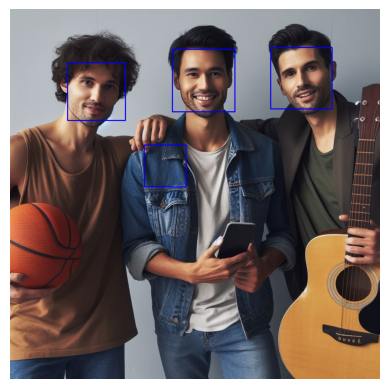

In [79]:
 # 탐지된 얼굴에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
#BGR이므로 255,0,0은 파란색 2픽셀
# 결과 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 숨기기
plt.show()